In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

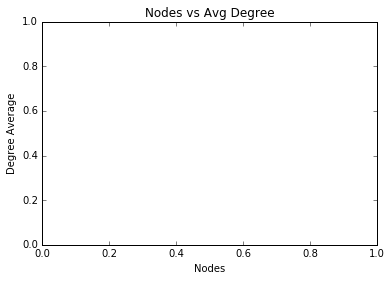

In [6]:
x = np.zeros(1000)
y = np.zeros(1000)
pref = np.zeros(1000)
for i in range(1000) :
    n = random.randint(20,10000)
    p = random.randint(2,7)
    G = nx.barabasi_albert_graph(n,p)
    avg_deg = float(sum(G.degree()))/float(n)
    x[i] = len(G.edges())
    y[i] = avg_deg
    pref[i] = p

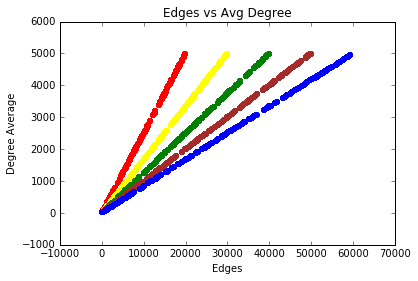

In [9]:
plt.title("Edges vs Avg Degree")
plt.xlabel("Edges")
plt.ylabel("Degree Average")
colors = ["red","yellow","green","brown","blue","cyan"]
for i in xrange(2,7) :
    x_ = list()
    y_ = list()
    for j in xrange(1000) :
        if pref[j] == i :
            x_.append(x[j])
            y_.append(y[j])
        plt.scatter(np.array(x_),np.array(y_),color=colors[i-2])
plt.show()

In [3]:
points = np.column_stack((x,y))
np.savetxt("result_edge.csv",points,delimiter=",")

In [4]:
regr = linear_model.LinearRegression()
x = x.reshape(-1,1)
regr.fit(x,y)
print regr.coef_
print "Mean ERROR : ",(np.mean((regr.predict(x) - y)**2))**0.5

[ 0.06894573]
Mean ERROR :  860.66449243


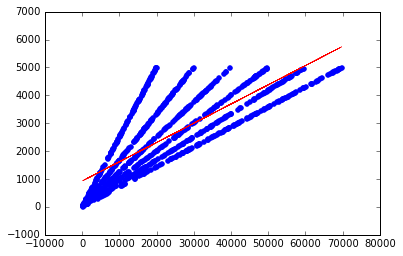

In [5]:
plt.scatter(x,y,color="blue")
plt.plot(x, regr.predict(x), color='red',
         linewidth=0.5)
plt.show()